In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import os
from pmdarima.arima import auto_arima
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

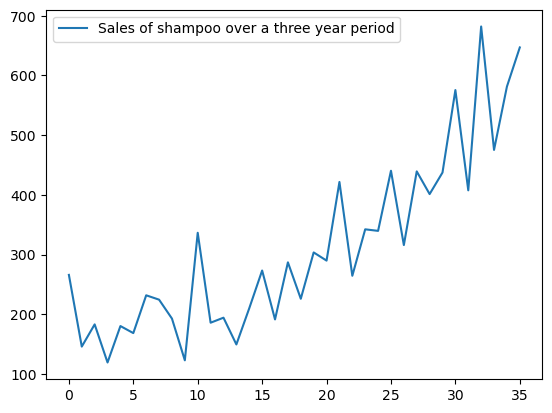

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=346.449, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=329.759, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=328.826, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=344.577, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=327.141, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=329.032, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=326.967, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=329.338, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 1.262 seconds


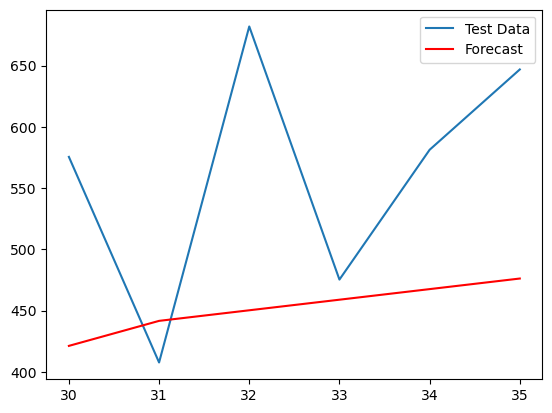

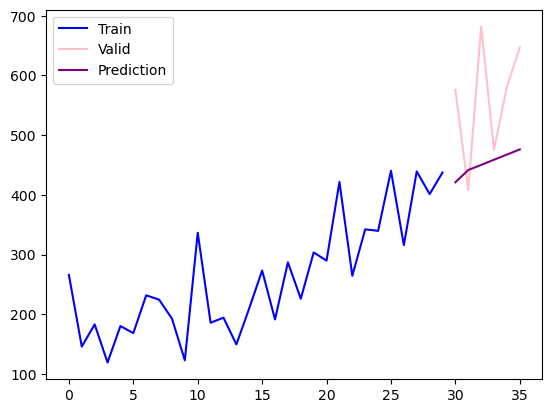

Test RMSE: 142.048
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=346.449, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=325.552, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=344.577, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=329.759, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=327.544, Time=0.33 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=327.542, Time=0.37 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=325.742, Time=0.14 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=344.139, Time=0.12 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=325.838, Time=0.24 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=322.439, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=327.141, Time=0.11 sec
 ARIMA(1,1,1)(2,0,0)[12] i

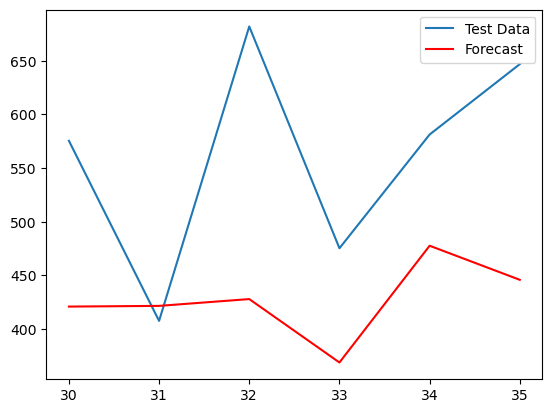

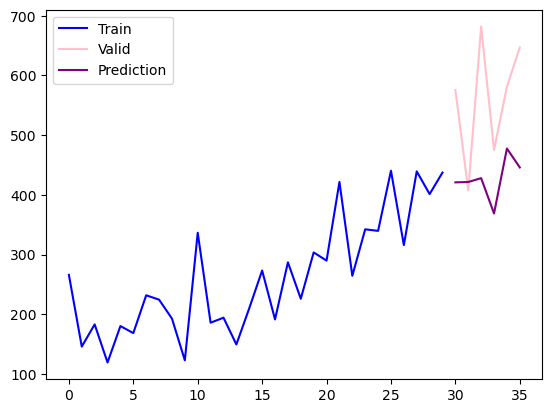

Test RMSE: 158.703


In [3]:
from pmdarima.arima import auto_arima
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

shamp = pd.read_csv("C:/Users\dai\Desktop\Machine Learning\Datasets\sales-of-shampoo-over-a-three-ye.csv")
shamp.plot()
plt.show()

y = shamp['Sales of shampoo over a three year period']
y_train = y[:-6]
y_test = y[-6:]

model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()


#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)


### SARMIA
model = auto_arima(y_train, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True,m=12)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()


#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)



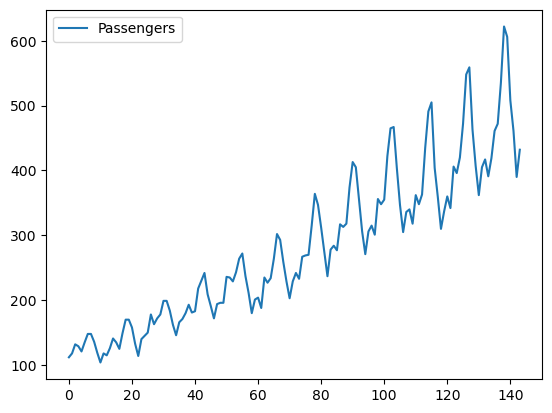

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218.683, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.738, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1276.259, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1258.440, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1225.563, Time=0.25 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 3.193

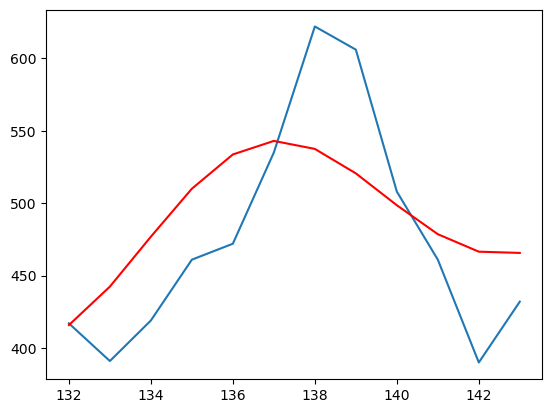

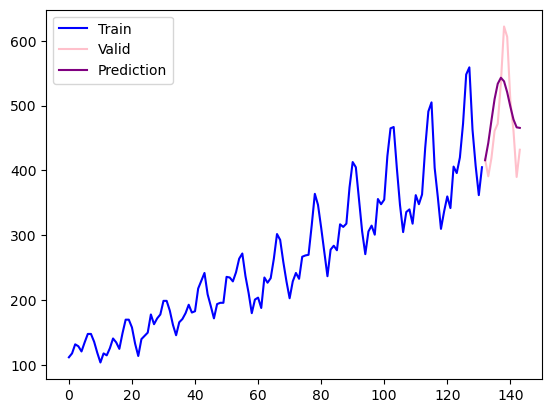

Test RMSE: 53.290
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.32 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.28 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.12 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.80 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.31 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.04 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.27 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.44 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.15 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.33 sec
 ARIMA(2,0,0)(1,1,1)[12]

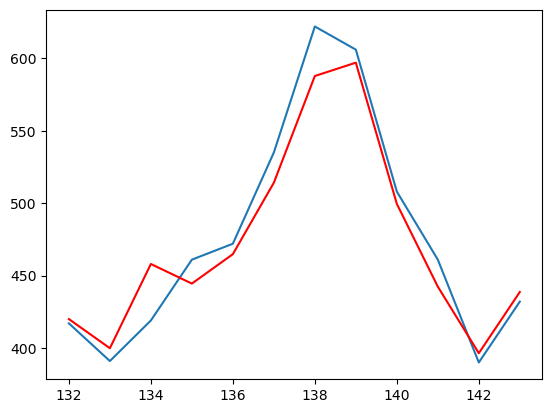

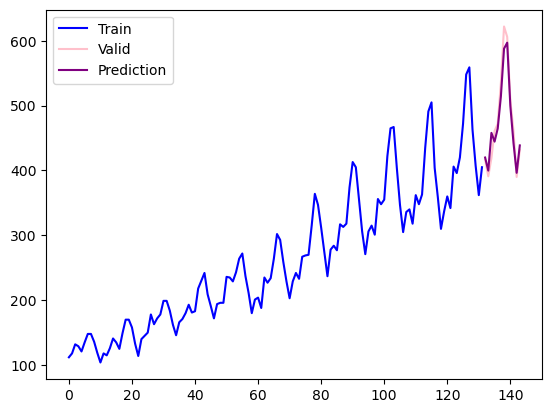

Test RMSE: 18.536


In [4]:

######### AirPassengers
air = pd.read_csv("C:/Users\dai\Desktop\Machine Learning\Datasets\AirPassengers.csv")
air.plot()
plt.show()

y = air['Passengers']
y_train = y[:-12]
y_test = y[-12:]


model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()


#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)


### SARMIA
model = auto_arima(y_train, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True,m=12)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()


#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

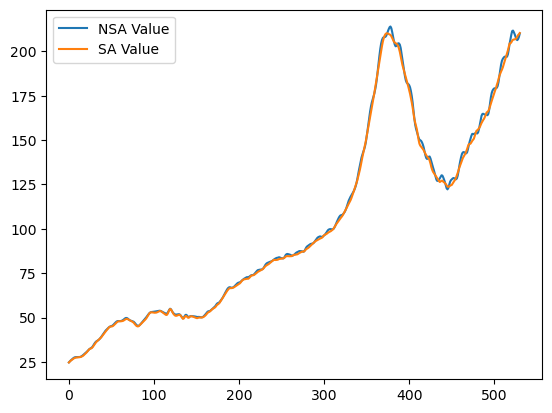

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-49.246, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1450.737, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25.346, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=897.481, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1510.192, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-38.939, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-25.052, Time=0.47 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-61.884, Time=0.69 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-25.247, Time=0.74 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-70.735, Time=1.20 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-71.735, Time=0.98 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-71.404, Time=0.56 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-69.988, Time=1.65 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-32.614, Time=0.48 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-71.

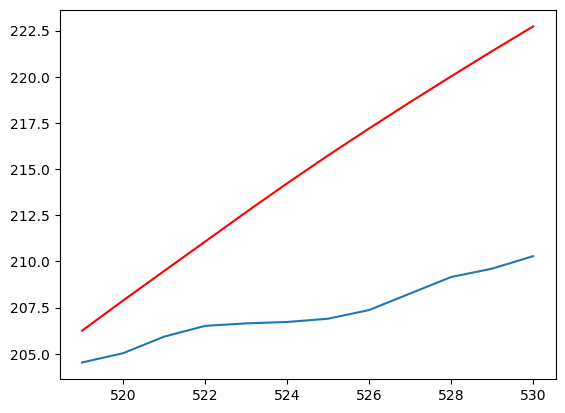

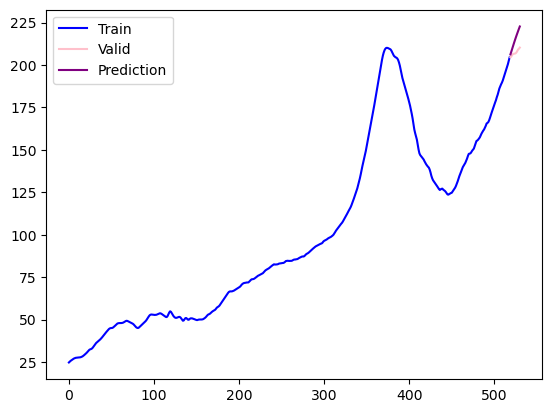

Test RMSE: 8.322
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-99.762, Time=2.81 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1450.737, Time=0.17 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=25.778, Time=0.77 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=660.930, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1510.192, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-75.690, Time=2.25 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-94.572, Time=2.38 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-99.913, Time=5.14 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-101.926, Time=4.59 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=-100.157, Time=3.21 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=-80.892, Time=2.72 sec
 ARIMA(3,1,2)(2,0,0)[12] intercept   : AIC=-121.215, Time=7.31 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=-113.519, Time=2.50 sec
 ARIMA(3,1,2)(2,0,1)[12] intercept   : AIC=-119.460, Time=6.75 sec
 ARIMA(3,1

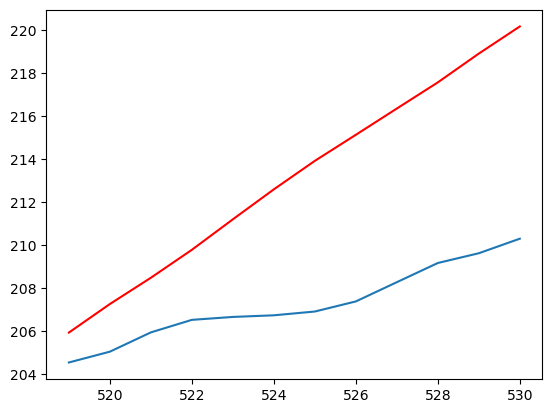

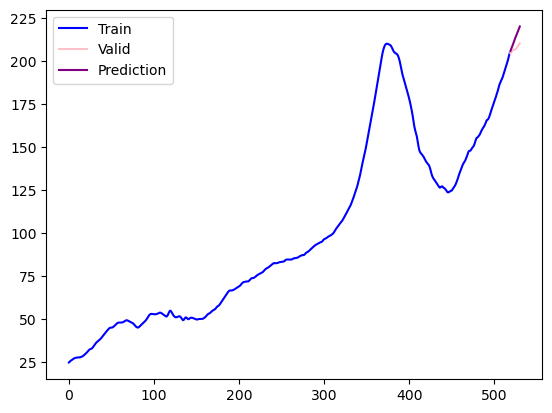

Test RMSE: 6.502


In [6]:

######### FMAP 2ND COLUMMN
air = pd.read_csv("C:/Users\dai\Desktop\Machine Learning\Datasets\FMAC-HPI_24420.csv")
air.plot()
plt.show()

y = air['SA Value']
y_train = y[:-12]
y_test = y[-12:]


model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()


#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)


### SARMIA
model = auto_arima(y_train, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True,m=12)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()


#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

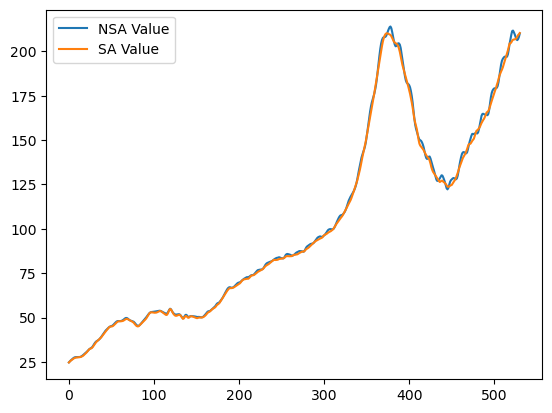

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-258.744, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1625.721, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=545.901, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1668.139, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-211.845, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-254.857, Time=0.44 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 9.395 secon

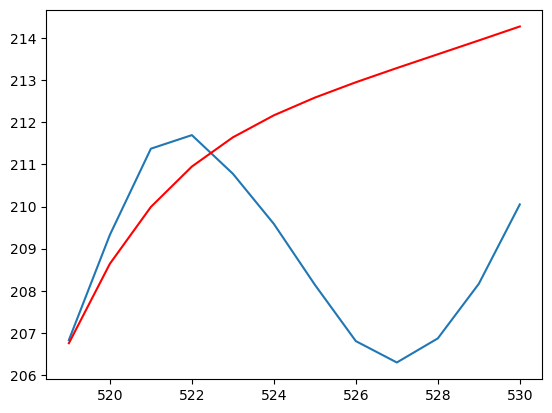

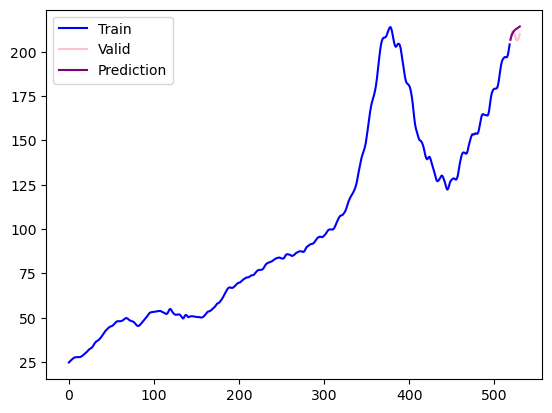

Test RMSE: 4.213
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-334.292, Time=2.65 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1625.721, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=301.267, Time=0.70 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1668.139, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=2.32 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-305.538, Time=2.36 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-322.450, Time=5.16 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-333.916, Time=5.39 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-258.744, Time=0.80 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=4.61 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=4.50 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=-329.080, Time=5.97 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-336.209, Time=2.32 sec
 ARIMA(1,1,2)(0,0,1)[12

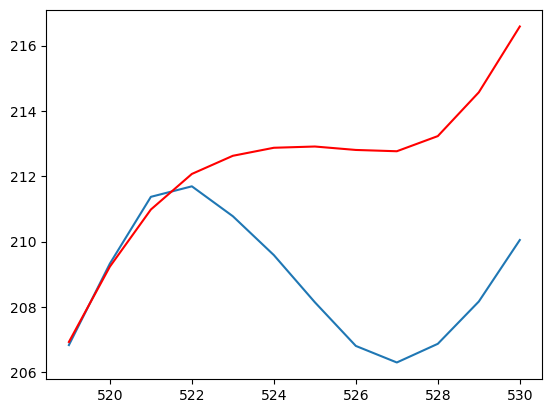

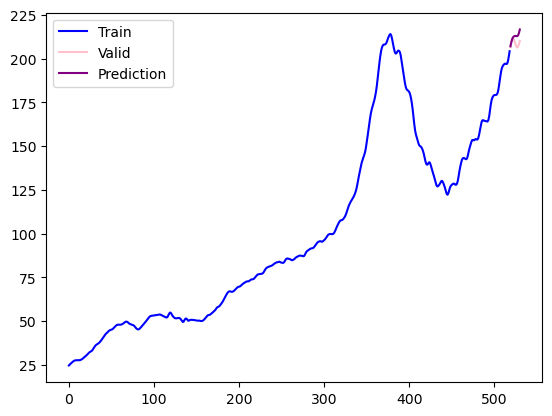

Test RMSE: 4.465


In [7]:

######### FMAP 1ST COLUMMN
air = pd.read_csv("C:/Users\dai\Desktop\Machine Learning\Datasets\FMAC-HPI_24420.csv")
air.plot()
plt.show()

y = air['NSA Value']
y_train = y[:-12]
y_test = y[-12:]


model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()


#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)


### SARMIA
model = auto_arima(y_train, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True,m=12)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()


#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

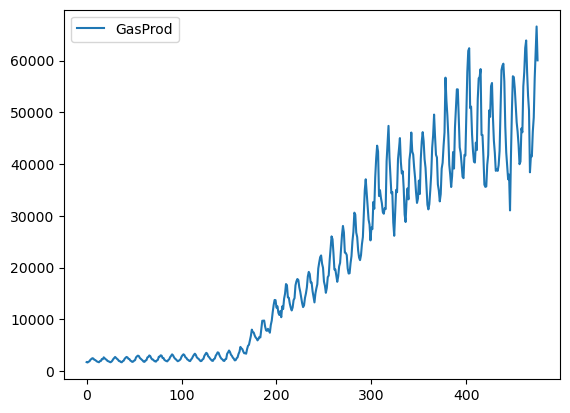

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8768.410, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8728.441, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8741.007, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8766.852, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8717.868, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8704.773, Time=0.16 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=8662.074, Time=0.19 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=8638.897, Time=0.30 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=8506.777, Time=1.60 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8516.071, Time=1.08 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=8511.586, Time=1.91 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8393.374, Time=1.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8447.335, Time=1.15 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : 

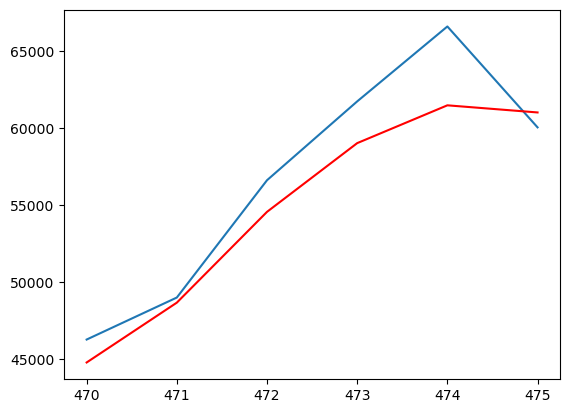

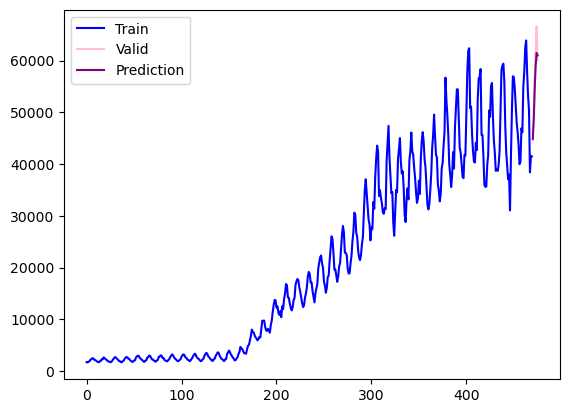

Test RMSE: 2613.073
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=8404.512, Time=2.58 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8768.410, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8398.887, Time=0.94 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8583.487, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8766.852, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8728.441, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.81 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=8330.028, Time=1.61 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=8583.004, Time=0.65 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=8357.864, Time=3.34 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=8346.758, Time=3.36 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=8514.741, Time=1.52 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=4.37 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8358.586, Time=1.32 sec
 ARIMA(2,

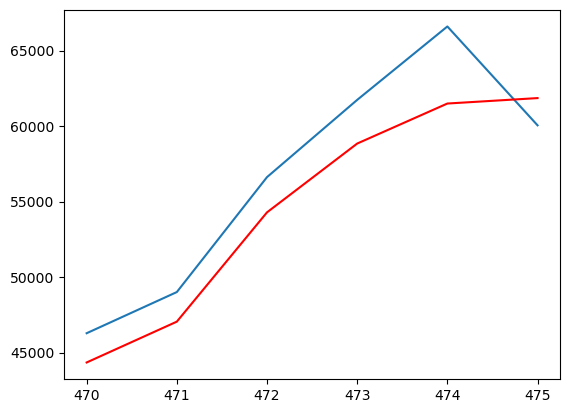

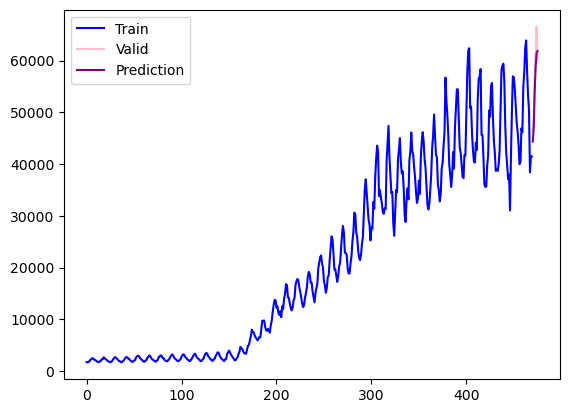

Test RMSE: 2906.197


In [8]:
######### AusGas
air = pd.read_csv("C:/Users\dai\Desktop\Machine Learning\Datasets\AusGas.csv")
air.plot()
plt.show()

y = air['GasProd']
y_train = y[:-6]
y_test = y[-6:]


model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()


#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)


### SARMIA
model = auto_arima(y_train, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True,m=12)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()


#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

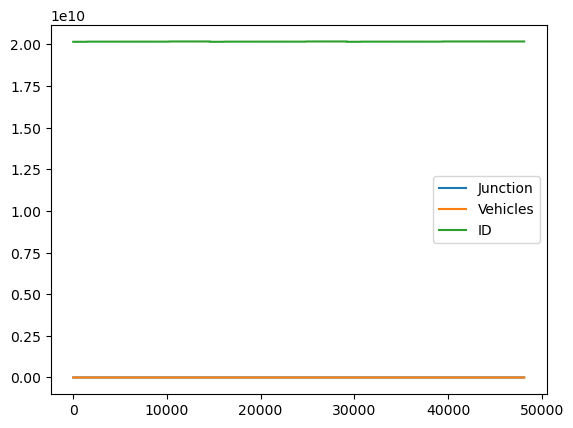

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=108.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=292997.826, Time=1.63 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=292864.897, Time=1.89 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=292876.341, Time=6.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=292995.826, Time=0.69 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=292759.966, Time=2.65 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=292674.075, Time=6.28 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=292649.542, Time=7.93 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=292515.514, Time=13.77 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=287884.093, Time=119.61 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=292637.601, Time=52.74 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=286727.488, Time=198.70 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=171.43 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=228.20 sec
 ARIMA(4,1,3)(

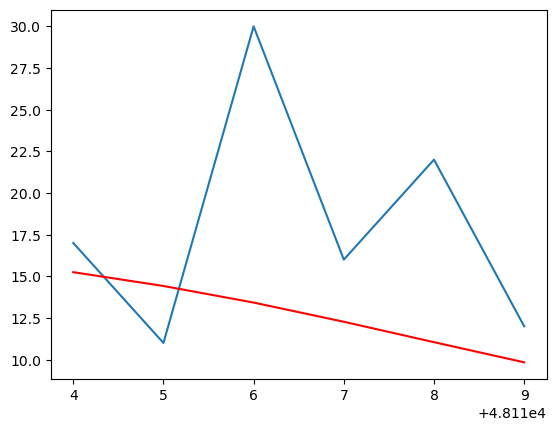

In [12]:
######### AusGas
train = pd.read_csv(r"C:/Users\dai\Downloads\train_ML_IOT.csv\train_ML_IOT.csv",index_col=0,parse_dates=['DateTime'])
train.plot()
plt.show()

junc_1 = train[train['Junction']]
jun1_veh = junc_1['Vehicles']
y = air['Junction']
y_train = y[:-6]
y_test = y[-6:]


model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()

In [6]:
######### 
train = pd.read_csv(r"C:/Users\dai\Downloads\train_ML_IOT.csv\train_ML_IOT.csv",index_col=0,parse_dates=['DateTime'])


junc_1 = train[train['Junction']==1]
jun1_veh = junc_1['Vehicles']
jun1_veh.head()

DateTime
2015-11-01 00:00:00    15
2015-11-01 01:00:00    13
2015-11-01 02:00:00    10
2015-11-01 03:00:00     7
2015-11-01 04:00:00     9
Name: Vehicles, dtype: int64

In [7]:
jun1_monthly = jun1_veh.resample("MS").sum()
jun1_monthly.shape

(20,)

In [8]:
y_train = jun1_monthly.iloc[:-4]
y_test = jun1_monthly.iloc[-4:]

In [9]:
model = auto_arima(y_train,trace = True,error_action='ignore',suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=264.457, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=263.679, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=263.623, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=277.004, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=266.213, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=264.707, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=277.778, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.735 seconds


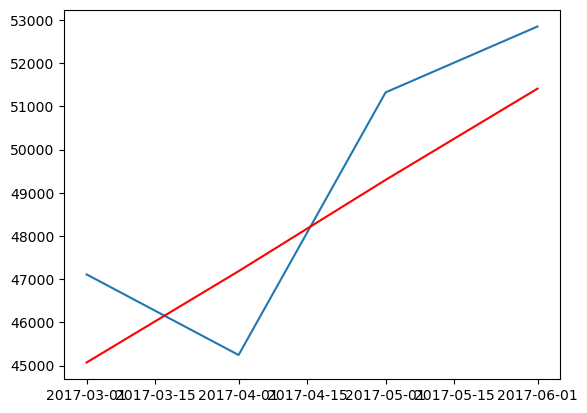

In [10]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()

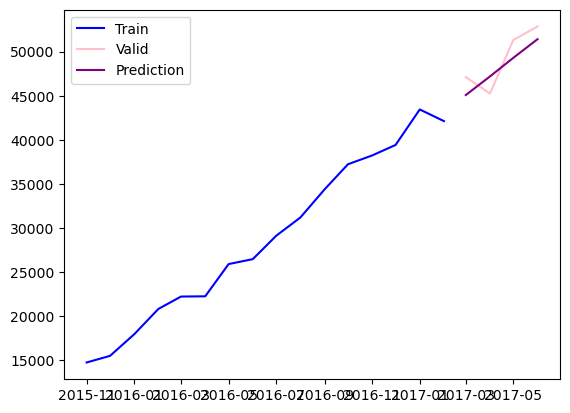

Test RMSE: 1877.837


In [11]:


#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)




Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=214.487, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=212.655, Time=0.21 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=251.791, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[4] intercept   : AIC=216.582, Time=0.02 sec
 ARIMA(0,0,1)(1,1,1)[4] intercept   : AIC=214.905, Time=0.24 sec
 ARIMA(0,0,1)(0,1,2)[4] intercept   : AIC=212.918, Time=0.15 sec
 ARIMA(0,0,1)(1,1,0)[4] intercept   : AIC=217.644, Time=0.18 sec
 ARIMA(0,0,1)(1,1,2)[4] intercept   : AIC=214.746, Time=0.29 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=210.820, Time=0.09 sec
 ARIMA(0,0,0)(1,1,1)[4] intercept   : AIC=214.452, Time=0.07 sec
 ARIMA(0,0,0)(0,1,2)[4] intercept   : AIC=213.230, Time=0.03 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=215.932, Time=0.12 sec
 ARIMA(0,0,0)(1,1,2)[4] intercept   : AIC=215.217, Time

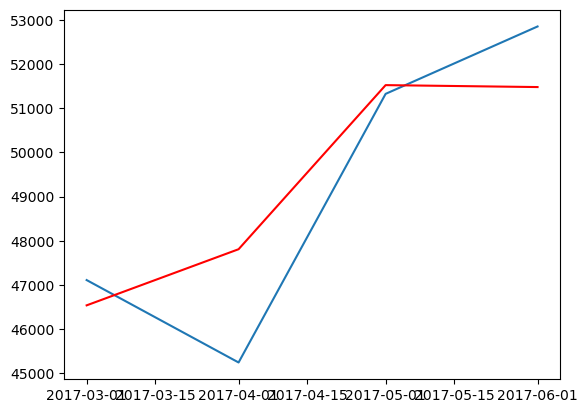

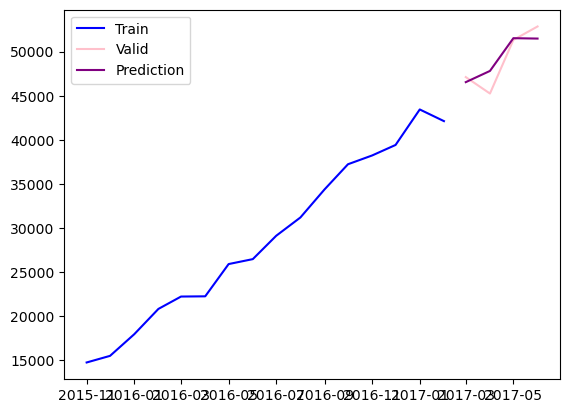

Test RMSE: 1485.348


In [13]:
### SARMIA
model = auto_arima(y_train, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True,m=4)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()


#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)